# Clustering

Clustering is a type of unsupervised learning that groups similar data points together. 
Unsupervised learning refers to the process of training a model on data without labeled responses (i.e. you do not know the $y$ for the input $x$).

Because of this, clustering is often used for exploratory data analysis (EDA for short), 
which is the process of analyzing datasets to summarize their main statistical characteristics
and pave the way for further modeling.

Today we will cover the classical clustering algorithm K-Means.

## 1. K-Means

In a nutshell, K-means is a clustering algorithm that partitions data into $k$ clusters, 
where each data point is assigned to the cluster with the nearest mean.

The [formal definition](https://en.wikipedia.org/wiki/K-means_clustering) goes:

_Given a set of observations $(x_1, x_2, ..., x_n)$, $k$-means clustering aims to partition the $n$ observations into $k$ ($\leq n$) sets $\mathbf{S} = \{S_1, S_2, ..., S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance)._

$$
\arg \min_{\mathbf{S}} \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \|\mathbf{x} - \boldsymbol{\mu}_i\|^2
$$

_where $\boldsymbol{\mu}_i$ is the mean (also called centroid) of points in $S_i$, i.e._

$$\boldsymbol{\mu}_i = \frac{1}{|S_i|} \sum_{\mathbf{x} \in S_i} \mathbf{x},$$

*$|S_i|$ is the size of $S_i$, and $\| \cdot \|$ is the usual $L^2$ norm.*

Scikit-learn has a built-in implementation of K-means clustering in the `sklearn.cluster` module.

Let's try to run it on the classic Iris dataset.
If you haven't heard of it, the Iris dataset is a collection of samples from three species of iris flowers (Iris setosa, Iris virginica, and Iris versicolor),
with four features: sepal length, sepal width, petal length, and petal width.
The target is to classify the species of iris flowers based on these features.

> 💻 **LIBRARY**
>
> You probably have already learnt much about how to use Matplotlib in the previous sections.
>
> In this section we will use a new library called `Yellowbrick`, which is a visualization library specialized for machine learning.
>
> You can see in the later cells that it provides much more convenience than vanilla Matplotlib.

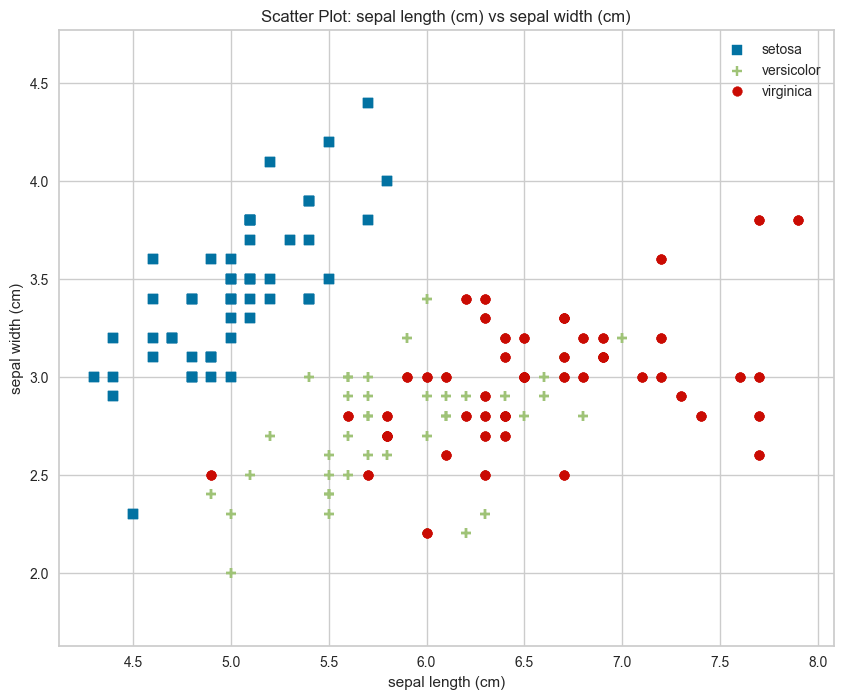

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from yellowbrick.contrib.scatter import ScatterVisualizer

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a scatter plot visualization of the first two features
plt.figure(figsize=(10, 8))
visualizer = ScatterVisualizer(
    x=feature_names[0], y=feature_names[1], classes=target_names
)
visualizer.fit_transform(X[:, 0:2], y)
visualizer.finalize()
plt.show()

Great! Now, let's run the clustering algorithm on the Iris dataset.

Since we know there are 3 species of iris flowers, we will cheat a bit and set $k=3$. :D

For visualization, we will only use the first two features: sepal length and sepal width in this case.
(Of course, this is not a nice idea in reality. You will learn about using dimensionality reduction techniques to visualize high-dimensional data in later chapters.)

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_sepal_features = X[:, :2]  # Use only the first two features (sepal length and width)

# Standardize the data
scaler = StandardScaler()
X_sepal_features_scaled = scaler.fit_transform(X_sepal_features)

# Take a look at the shape of input
print(f"Type of input: {type(X_sepal_features_scaled)}")
print(f"Shape of input: {X_sepal_features_scaled.shape}")

Type of input: <class 'numpy.ndarray'>
Shape of input: (150, 2)


In [ ]:
# The main visualization function
def visualize_clusters(X, y, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(X)
    plt.figure(figsize=(10, 8))
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=clusters,
        cmap="viridis",
        marker="o",
        edgecolor="black",
        s=50,
    )
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        c="red",
        marker="X",
        s=200,
        label="Centroids",
    )
    plt.title(f"K-means Clustering (n={n_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

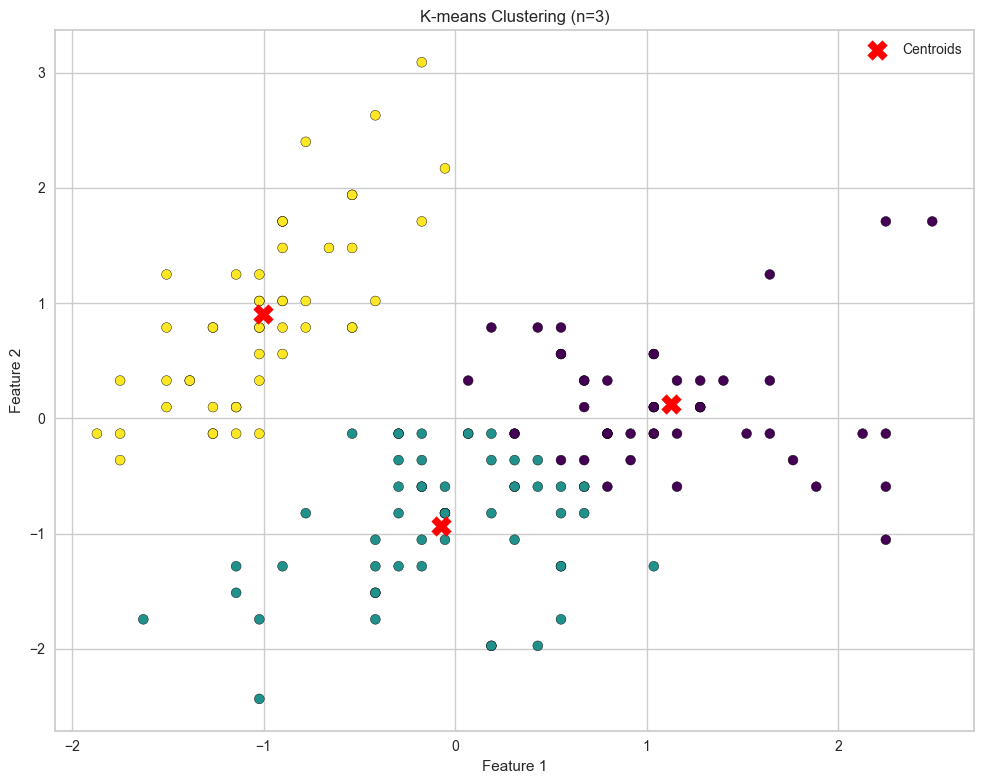

In [4]:
visualize_clusters(X_sepal_features_scaled, y, n_clusters=3)

> 🤔 **THINKING**
>
> - Compare the results to the ground truth labels. How well does the clustering algorithm perform?

Now, remember that in reality, unsupervised learning does not have labels, which means we do not know how many clusters are there.

Picking the wrong number of clusters can lead to poor clustering performance, or produce meaningless clusters.

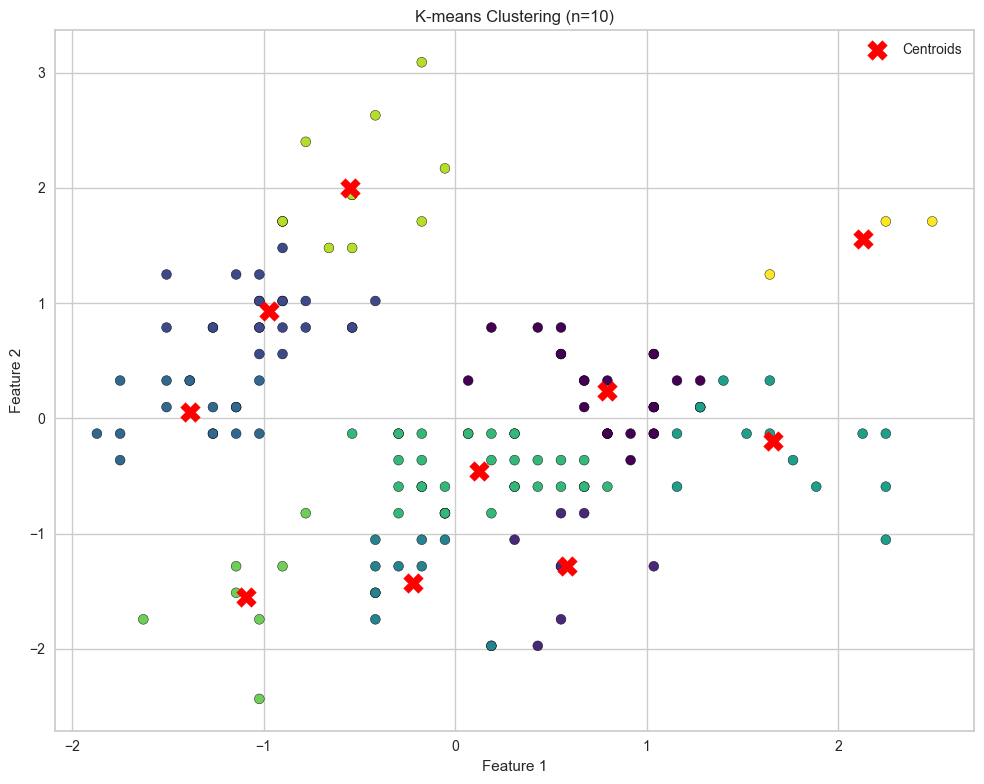

In [5]:
visualize_clusters(X_sepal_features_scaled, y, n_clusters=10)

## 2. Picking the right `k`

So, how do we pick the right number of clusters?

One of the most effective way is that you have some prior knowledge about the data, usually from domain knowledge.

For example, you already know that there are 3 species of iris flowers, so you can set $k=3$.

You can also do some educated guess based on the background knowledge of the data (that is why if you are doing data analysis on Kaggle for instance, the background knowledge of the data is very important and is a must-read).

But you may ask, are there any mathematical ways to suggest the right number of clusters?

Actually yes. Let's look at two methods frequently used in K-means:
- The Elbow Method
- The Silhouette Method

### 2.1 The Elbow Method

The rationale of the elbow method is that you plot some specific metric (usually the lower the better) against the number of clusters $k$.

Then you look for the "elbow" point in the plot, which is the point where the metric starts to decrease at a slower rate. 
This is a strong indicator that the model had striked a balance that has divided the data into **enough** clusters, but **not too much so as to generate too many meaningless** clusters.

The `Yellowbrick` library has a built-in function to do this for you. By default, the metric it uses **distortion**, which computes the sum of squared distances from each point to its assigned center.

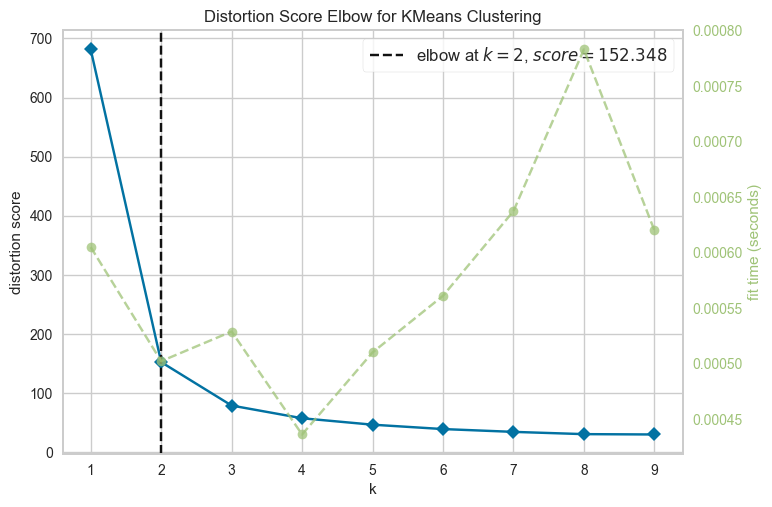

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model,
    k=(1, 10),  # Range of k values to test
    timings=True,  # Show the time taken for training
)
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.show()

Not bad! The result `k=2` is very close to the ground truth `k=3` we used in the previous section.

> 📚 **EXERCISE**
>
> - This methodology is universal for clustering. Find a dataset and try it on your own. How does it perform?
> - Is the existence of an obvious elbow point guaranteed? (If you are interested how an elbow point is found, check this paper: [(ICDCSW '11) Finding a "Kneedle" in a Haystack: Detecting Knee Points in System Behavior](https://dl.acm.org/doi/10.1109/icdcsw.2011.20))

In [ ]:
# === Your code here ===

### 2.2 The Silhouette Method

Another method to determine the number of clusters (which is slightly complicated) is the silhouette method.

It is done by calculating the silhouette coefficient, which measures:
1. How close each point is to other points in its own cluster (cohesion)
2. How far it is from points in neighboring clusters (separation)

For each data point i, the Silhouette Coefficient s(i) is calculated as:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

where:
- $a(i)$ = average distance between point i and all other points in the same cluster (lower is better)
- $b(i)$ = average distance between point i and all points in the nearest neighboring cluster (higher is better)

As you may have noticed:
- If s(i) is close to 1: The point fits very well in its cluster and is far from other clusters
- If s(i) is close to -1: The point might be in the wrong cluster

The silouette graph plots the silhouette coefficient for each sample in the dataset.

The rule of thumb is that we choose K such that:
- The average silhouette coefficient is relatively high
- There are no or very few clusters that has its largest silhouette coefficient lower than the average silhouette coefficient of the dataset
- The size/width of the clusters (which is, the sample count of the cluster) is relatively similar

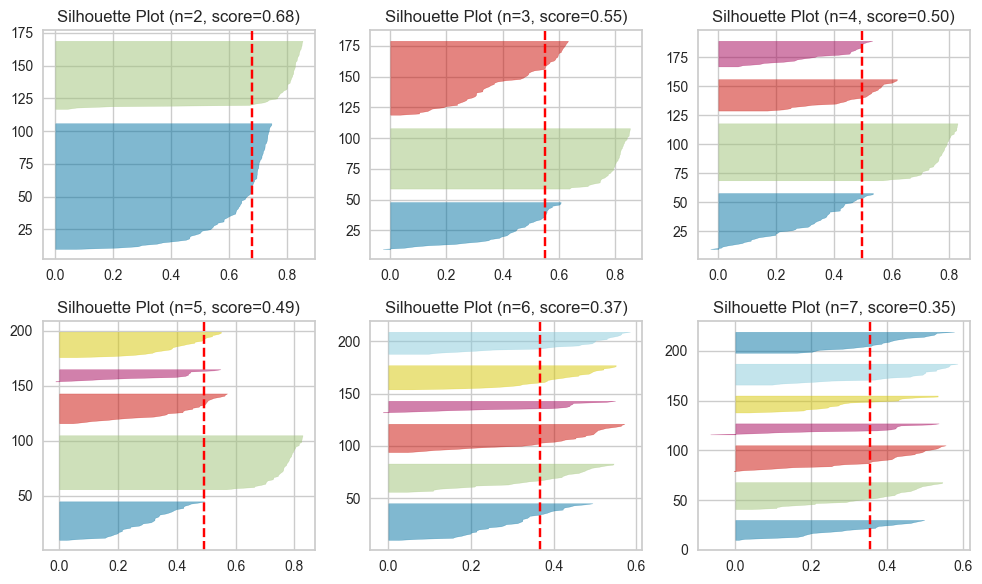

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

# We will test 2~7 clusters and plot them in one figure
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
for i, n_clusters in enumerate(range(2, 8)):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(model, ax=axes[i], colors="yellowbrick")
    visualizer.fit(X)  # Fit the data to the visualizer
    axes[i].set_title(
        f"Silhouette Plot (n={n_clusters}, score={visualizer.silhouette_score_:.2f})"
    )
plt.tight_layout()
plt.show()

> 🤔 **THINKING**
>
> - Based on your observation, which `k` would you choose?
> - Do you know other clustering algorithms? Can you reason whether the two methods we introduced can be used for them?